<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Developing a classification model for Twitter topics (Formula 1 vs MotoGP)

### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Exploratory Data Analysis

We have collected tweets from Formula 1 (@F1) and MotoGP (@MotoGP) official Twitter accounts for the period of 1st Jan 2022 to 28th Feb 2023. In this section, we will be exploring if there are any differences between tweets from the two accounts such as tweet length, word count, number of likes, number of retweets, etc. This will give us a better understanding of the dataset before we use it to train our model.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read Data
df = pd.read_csv("../data/train_data.csv")
df.head()

,date,content,username,like_count,retweet_count
0,2023-02-27 20:00:00+00:00,Tensions were running high between the Team Pr...,F1,22500,1638
1,2023-02-27 19:00:02+00:00,"Striking a pose, ft. a glorious mullet too ✨\n...",F1,3553,291
2,2023-02-27 18:02:00+00:00,💰🆕 FANTASY PRICE REVEAL 🆕💰\n\nCreate your ulti...,F1,1527,146
3,2023-02-27 17:55:00+00:00,It's almost time for F1 Fantasy to restart! 🤩\...,F1,1215,210
4,2023-02-27 17:37:05+00:00,We couldn't not put these two together! 🥰\n\n@...,F1,8125,785


In [3]:
# Creating new columns for year, month, tweet length and tweet word count
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['tweet_length'] = df['content'].map(len)
df['tweet_word_count'] = df['content'].map(lambda x: len(x.split()))
df.head()

,date,content,username,like_count,retweet_count,year,month,tweet_length,tweet_word_count
0,2023-02-27 20:00:00+00:00,Tensions were running high between the Team Pr...,F1,22500,1638,2023,2,181,27
1,2023-02-27 19:00:02+00:00,"Striking a pose, ft. a glorious mullet too ✨\n...",F1,3553,291,2023,2,243,45
2,2023-02-27 18:02:00+00:00,💰🆕 FANTASY PRICE REVEAL 🆕💰\n\nCreate your ulti...,F1,1527,146,2023,2,132,23
3,2023-02-27 17:55:00+00:00,It's almost time for F1 Fantasy to restart! 🤩\...,F1,1215,210,2023,2,164,30
4,2023-02-27 17:37:05+00:00,We couldn't not put these two together! 🥰\n\n@...,F1,8125,785,2023,2,114,16


In [4]:
# Renaming months into 13 and 14 if year is 2023 for easy charting
df['month'] = df['month'] + 12*(df['year'] == 2023)

#### Comparing Tweet Length

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/3800492839.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['username']=='F1']['tweet_length'], kde=False, label = "F1")
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/3800492839.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

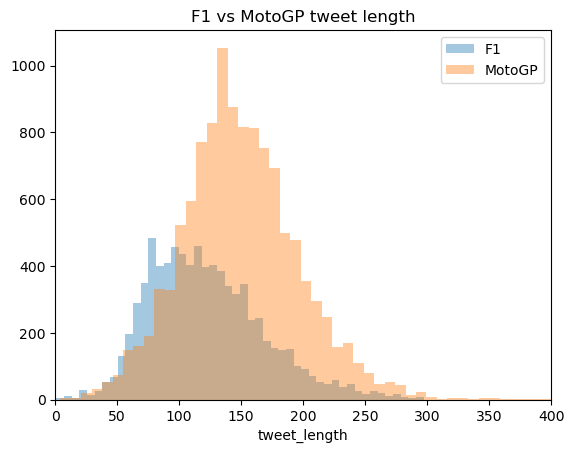

In [5]:
# Compare the distribution charts for tweet length
sns.distplot(df[df['username']=='F1']['tweet_length'], kde=False, label = "F1")
                  
sns.distplot(df[df['username']=='MotoGP']['tweet_length'], kde=False, label = "MotoGP")

plt.xlim(0,400)
plt.legend()
plt.title('F1 vs MotoGP tweet length')
plt.show()

In [6]:
# Create monthly average for tweet length
average_monthly_tweet_length_f1 = df[df['username']=='F1'].groupby('month')['tweet_length'].mean()
average_monthly_tweet_length_motogp = df[df['username']=='MotoGP'].groupby('month')['tweet_length'].mean()

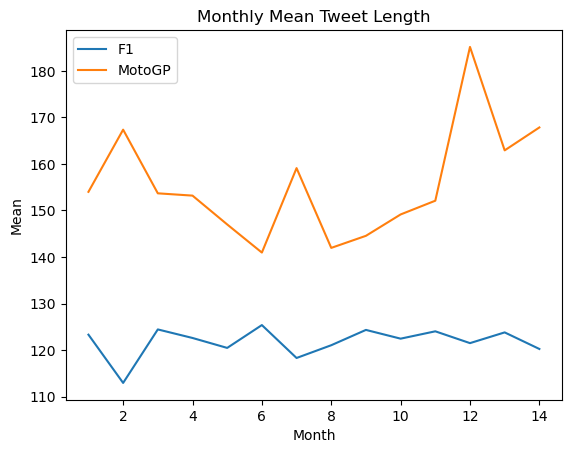

In [7]:
# Compare monthly average for tweet length
plt.plot(average_monthly_tweet_length_f1.index, average_monthly_tweet_length_f1, label = "F1")
plt.plot(average_monthly_tweet_length_motogp.index, average_monthly_tweet_length_motogp, label = "MotoGP")
plt.xlabel('Month')
plt.ylabel('Mean')
plt.title('Monthly Mean Tweet Length')
plt.legend()
plt.show()

##### Finding 1: MotoGP tweets are consistently longer than F1 tweets.

#### Comparing tweet word count

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/1220366525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['username']=='F1']['tweet_word_count'], kde=False, label = "F1")
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/1220366525.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

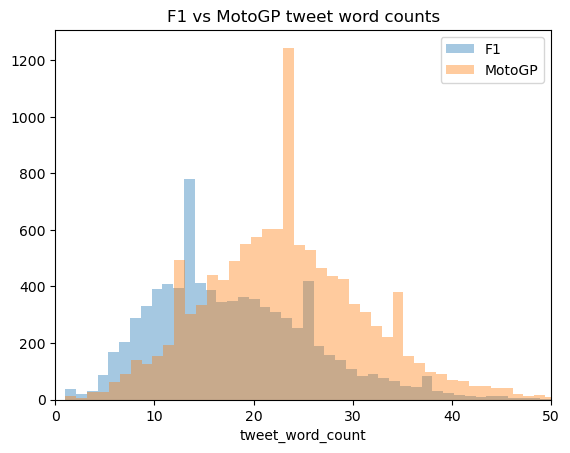

In [8]:
# Compare the distribution charts for tweet word count
sns.distplot(df[df['username']=='F1']['tweet_word_count'], kde=False, label = "F1")
                  
sns.distplot(df[df['username']=='MotoGP']['tweet_word_count'], kde=False, label = "MotoGP")

plt.xlim(0,50)
plt.legend()
plt.title('F1 vs MotoGP tweet word counts')
plt.show()

In [9]:
# Create monthly average for tweet word count
average_monthly_tweet_word_count_f1 = df[df['username']=='F1'].groupby('month')['tweet_word_count'].mean()
average_monthly_tweet_word_count_motogp = df[df['username']=='MotoGP'].groupby('month')['tweet_word_count'].mean()

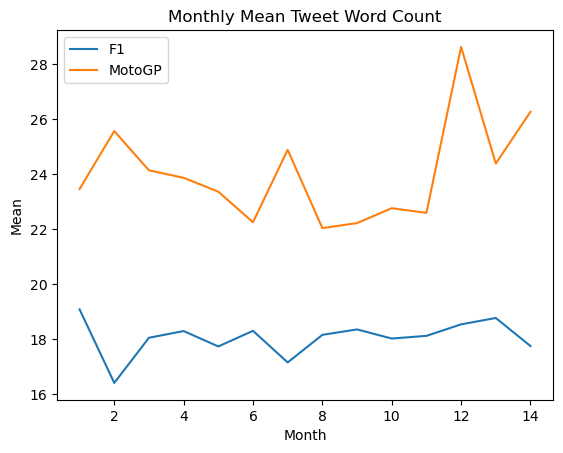

In [10]:
# Compare monthly average for tweet word count
plt.plot(average_monthly_tweet_word_count_f1.index, average_monthly_tweet_word_count_f1, label = "F1")
plt.plot(average_monthly_tweet_word_count_motogp.index, average_monthly_tweet_word_count_motogp, label = "MotoGP")
plt.xlabel('Month')
plt.ylabel('Mean')
plt.title('Monthly Mean Tweet Word Count')
plt.legend()
plt.show()

##### Finding 2: MotoGP tweets consistently uses more words than F1 tweets.

#### Comparing number of likes

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/2544098381.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['username']=='F1']['like_count'], kde=False, label = "F1")
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/2544098381.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

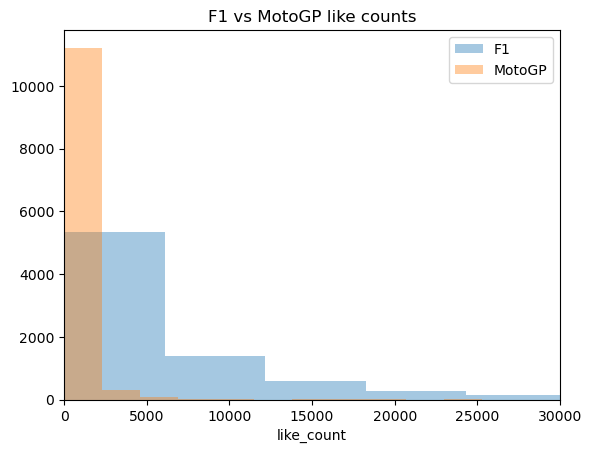

In [11]:
# Compare the distribution charts for number of likes
sns.distplot(df[df['username']=='F1']['like_count'], kde=False, label = "F1")
                  
sns.distplot(df[df['username']=='MotoGP']['like_count'], kde=False, label = "MotoGP")

plt.xlim(0,30000)
plt.legend()
plt.title('F1 vs MotoGP like counts')
plt.show()

In [12]:
# Create monthly average for number of likes
average_monthly_likes_f1 = df[df['username']=='F1'].groupby('month')['like_count'].mean()
average_monthly_likes_motogp = df[df['username']=='MotoGP'].groupby('month')['like_count'].mean()

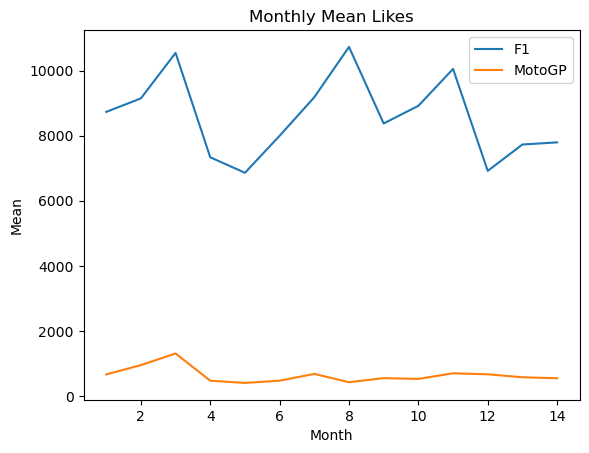

In [13]:
# Compare monthly average for number of likes
plt.plot(average_monthly_likes_f1.index, average_monthly_likes_f1, label = "F1")
plt.plot(average_monthly_likes_motogp.index, average_monthly_likes_motogp, label = "MotoGP")
plt.xlabel('Month')
plt.ylabel('Mean')
plt.title('Monthly Mean Likes')
plt.legend()
plt.show()

##### Finding 3: F1 tweets consistently get more likes than MotoGP tweets.

#### Comparing number of retweets

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/1802123515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['username']=='F1']['retweet_count'], kde=False, label = "F1")
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_2061/1802123515.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

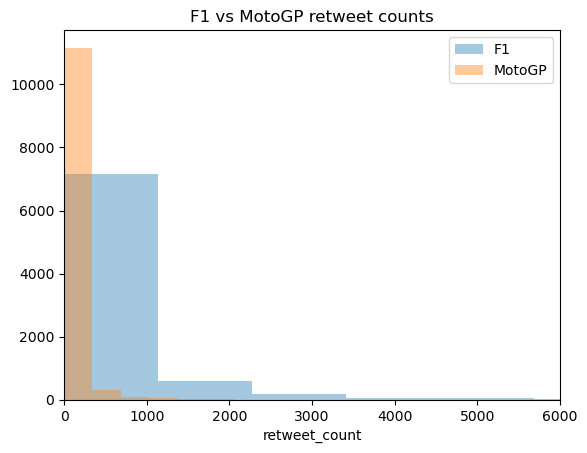

In [14]:
# Compare the distribution charts for number of retweets
sns.distplot(df[df['username']=='F1']['retweet_count'], kde=False, label = "F1")
                  
sns.distplot(df[df['username']=='MotoGP']['retweet_count'], kde=False, label = "MotoGP")

plt.xlim(0,6000)
plt.legend()
plt.title('F1 vs MotoGP retweet counts')
plt.show()

In [15]:
# Create monthly average for number of retweets
average_monthly_retweets_f1 = df[df['username']=='F1'].groupby('month')['retweet_count'].mean()
average_monthly_retweets_motogp = df[df['username']=='MotoGP'].groupby('month')['retweet_count'].mean()

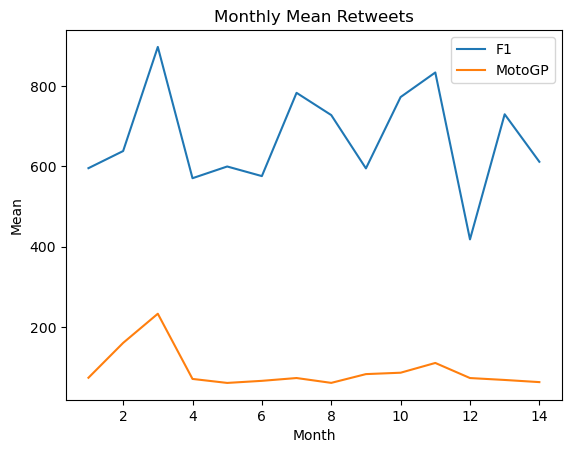

In [16]:
# Compare monthly average for number of retweets
plt.plot(average_monthly_retweets_f1.index, average_monthly_retweets_f1,label = "F1")
plt.plot(average_monthly_retweets_motogp.index, average_monthly_retweets_motogp,label = "MotoGP")
plt.xlabel('Month')
plt.ylabel('Mean')
plt.title('Monthly Mean Retweets')
plt.legend()
plt.show()

##### Finding 4: F1 tweets consistently get more retweets than MotoGP tweets.

#### Comparing Top words that appear in tweets

In [17]:
# Instantiate Count Vectorizer and fit the data, only count words that minimally appeared 10 times.
cv = CountVectorizer(stop_words='english', min_df=10)
cv.fit(df['content'])

CountVectorizer(min_df=10, stop_words='english')

In [18]:
# Transform data into individual words
content_cv = cv.transform(df['content'])
content_df = pd.DataFrame(content_cv.todense(), columns=cv.get_feature_names())
content_df.head()

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,100th,10th,11,11th,12,125cc,12th,...,youtube,yuki,yukitsunoda07,zandvoort,zarco,zero,zhou,zhouguanyu24,zone,zonta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<AxesSubplot: >

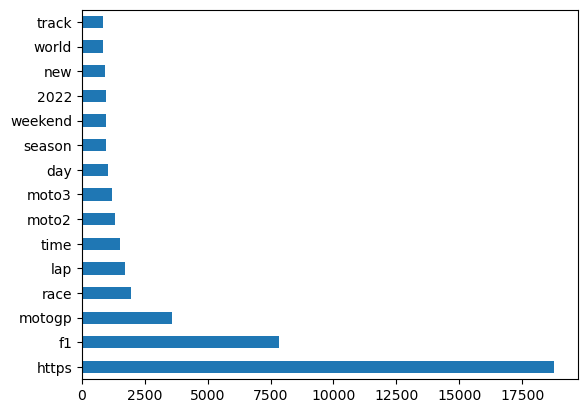

In [19]:
# Look at top 15 most frequently appearing words in data
content_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

In [20]:
# Look at top 15 most frequently appearing words for F1 tweets
top_words = pd.concat([content_df, df['username']], axis=1)
top_words[top_words['username'] == 'F1'].drop(columns='username').sum().sort_values(ascending=False).head(15)

f1            7811
https         7605
lap            818
race           765
verstappen     586
leclerc        516
2022           503
season         481
time           448
max            407
track          364
team           363
hamilton       350
car            347
sainz          340
dtype: int64

In [21]:
# Look at top 15 most frequently appearing words for MotoGP tweets
top_words[top_words['username'] == 'MotoGP'].drop(columns='username').sum().sort_values(ascending=False).head(15)

https           11167
motogp           3563
moto2            1324
moto3            1192
race             1177
time             1070
lap               897
rider             781
day               756
fabioq20          748
world             738
peccobagnaia      731
riders            682
weekend           643
new               597
dtype: int64

In [22]:
# Look at top 15 most frequently appearing bigrams for data
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(df['content'])

bigrams_cv = cv_bigrams.transform(df['content'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(15)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


f1 https              5616
motogp https          1586
australiangp https     440
sanmarinogp https      435
austriangp https       433
malaysiangp https      428
italiangp https        420
frenchgp https         405
dutchgp https          399
thaigp https           389
spanishgp https        388
britishgp https        362
catalangp https        356
portuguesegp https     346
japanesegp https       345
dtype: int64

##### Finding 5: https appears very often. Urls are often included in the tweets.

#### Summary of findings:
1. MotoGP tweets are consistently longer than F1 tweets.
2. MotoGP tweets consistently uses more words than F1 tweets.
3. F1 tweets consistently get more likes than MotoGP tweets.
4. F1 tweets consistently get more retweets than MotoGP tweets.
5. Urls are often included in the tweets.

#### Conclusion of EDA: 
1. We can potentially include tweet length, tweet word count, number of likes, and number of retweets as features to improve model performance, as we have seen that F1 and MotoGP tweets are consistently different in these features.
2. We should remove URLs when preprocessing our data, before building our model.